<a href="https://colab.research.google.com/github/NeryLuciano/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/BIG_A5_Clustering_LNF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **Tarefa de Aprofundamento 5** 
## CASO: Clustering, Segmentando Países pela Força de Trabalho 
---
<br>
<br>





A partir deste notebook você vai criar modelos de clusterização para os países com base em suas características de força de trabalho. 

Em seguida, com base nos seus resultados, responda o **questionário do Moodle**. 

# Basic imports

In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exploração dos Dados



Esta base de dados contém a percentagem da população empregada em diferentes indústrias em 26 países europeus em 1979. 

- Country - o nome do país (identificador)
- Agr -% da força de trabalho empregada na agricultura
- Min -% na mineração
- Man -% na fabricação
- PS -% nas indústrias de fornecimento de energia
- Con - % em construção
- SI -% nas indústrias de serviços
- Fin -% em finanças
- SPS -% em serviços sociais e pessoais
- TC -% em transporte e comunicações

Fonte: https://statsandr.com/ 

**Objetivo:** Segmentar os países em grupos para aplicação de diferentes políticas públicas empregando Clusterização.

In [225]:
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/Eurojobs.csv')
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1


## Inspecione os dados

In [226]:
df.describe(include='all')

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
count,26,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,19.130769,1.253846,27.007692,0.907692,8.165385,12.957692,4.000000,20.023077,6.546154
std,NaN,15.546569,0.970044,7.007763,0.376216,1.645586,4.575253,2.806564,6.829542,1.391469
min,NaN,2.700000,0.100000,7.900000,0.100000,2.800000,5.200000,0.500000,5.300000,3.200000
25%,NaN,7.700000,0.525000,23.000000,0.600000,7.525000,9.250000,1.225000,16.250000,5.700000
50%,NaN,14.450000,0.950000,27.550000,0.850000,8.350000,14.400000,4.650000,19.650000,6.700000
75%,NaN,23.675000,1.800000,30.200000,1.175000,8.975000,16.875000,5.925000,24.125000,7.075000


In [227]:
#Verificação de dados ausentes

df.isnull().sum()

Country    0
Agr        0
Min        0
Man        0
PS         0
Con        0
SI         0
Fin        0
SPS        0
TC         0
dtype: int64

## Preparação dos dados

Normalize os dados o `StandardScaler` (melhor) ou a função `scale`.

$$ z_i = \frac{x_i - \bar{x}}{\sigma(x)}$$

E não esqueça de excluir dados não úteis ao treinamento. Depois de normalizar os dados os valores devem apresentar média próxima de 0 e desvio padrão próximo de 1.

In [228]:
# seu código

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(columns= ['Country']))
X = scaler.transform(df.drop(columns= ['Country']))

X[0:11]



array([[-1.03844649, -0.37199739,  0.08619551, -0.02085144,  0.02145187,
         1.3690936 ,  0.79940055,  0.9820822 ,  0.47920226],
       [-0.65142586, -1.21303495, -0.75784885, -0.83405766,  0.08342395,
         0.36606322,  0.90840971,  1.81828787,  0.40591251],
       [-0.54647111, -0.47712708,  0.07164302, -0.02085144,  0.4552564 ,
         0.85643363,  0.72672777,  0.38479244, -0.62014411],
       [-0.81541765,  0.0485214 ,  1.27949961, -0.02085144, -0.53629681,
         0.32148409,  0.36336389,  0.33999571, -0.32698507],
       [ 0.26692818, -0.26686769, -0.91792623,  1.06342351, -0.41235266,
         0.85643363, -0.43603666,  0.11601205, -0.32698507],
       [-0.21192785, -0.68738647,  0.08619551, -1.10512639,  1.13694923,
         1.14619796, -0.87207332,  0.01148634, -0.62014411],
       [-0.74982093,  1.94085592,  0.55187516, -0.29192018,  0.64117263,
         1.23535621,  0.21801833, -0.12290385, -0.25369532],
       [-0.84165634, -1.21303495, -0.65598143,  0.2502173 ,  1

## Número de Clusters

(Moodle) **Q1**. Qual o melhor número de clusters pela *regra do cotovelo* e pelo valor médio de silhueta aplicanaod o `kmedias`? (verifique de 2 a 10 clusters)

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.   



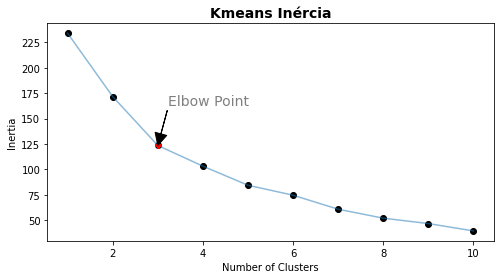

In [229]:
from sklearn.cluster import KMeans

def inercia(X=X, kmin=2, kmax=11):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1234)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]), 
            xytext=(10, 40), fontsize=14,
            textcoords='offset points', 
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()  

In [230]:
# seu código

from sklearn import metrics

for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 1234)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.323
Silhueta média para 3 clusters:  0.278
Silhueta média para 4 clusters:  0.231
Silhueta média para 5 clusters:  0.202
Silhueta média para 6 clusters:  0.164
Silhueta média para 7 clusters:  0.2
Silhueta média para 8 clusters:  0.194
Silhueta média para 9 clusters:  0.182
Silhueta média para 10 clusters:  0.181


(Moodle) **Q2**. Qual ao valor médio de silhueta para o melhor número de clusters na clusterização hierárquica (aglomerativa) para os esquemas de ligação (*linkage*) `ward` (padrão do `scikit-learn`),`complete` e `single`? (verifique de 2 a 10 clusters)

> Não empregue outros parâmetros não solicitados. 

In [231]:
# Ligação ward

from sklearn.cluster import AgglomerativeClustering

for n_clusters1 in range(2,11):
    clf = AgglomerativeClustering(n_clusters=n_clusters1 )
    clf.fit(X)
    print('Silhueta média (linkage) para', n_clusters1 , ' clusters: ', 
    np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

    # Resultados
    labels = clf.labels_
    print(labels)

Silhueta média (linkage) para 2  clusters:  0.181
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Silhueta média (linkage) para 3  clusters:  0.456
[2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 2 2 1 0 0 0 0 0 0 0 1]
Silhueta média (linkage) para 4  clusters:  0.244
[2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 2 2 0 1 3 3 3 1 1 1 0]
Silhueta média (linkage) para 5  clusters:  0.251
[0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 4 1 3 3 3 1 1 1 2]
Silhueta média (linkage) para 6  clusters:  0.242
[1 1 1 2 1 2 2 1 1 1 1 0 1 0 0 1 2 4 0 3 3 3 0 0 0 5]
Silhueta média (linkage) para 7  clusters:  0.179
[0 0 0 6 0 6 6 0 0 0 0 1 0 1 1 0 6 4 2 3 3 3 2 2 2 5]
Silhueta média (linkage) para 8  clusters:  0.187
[1 1 1 6 7 6 6 1 7 7 7 0 1 0 0 1 6 4 2 3 3 3 2 2 2 5]
Silhueta média (linkage) para 9  clusters:  0.175
[1 1 1 2 7 2 2 1 7 7 7 6 1 6 8 1 2 4 0 3 3 3 0 0 0 5]
Silhueta média (linkage) para 10  clusters:  0.18
[1 1 1 0 7 0 0 1 7 7 7 6 1 6 8 1 0 9 2 3 3 3 2 2 4 5]


In [232]:
# Ligação complete

from sklearn.cluster import AgglomerativeClustering

for n_clusters2 in range(2,11):
    clf = AgglomerativeClustering(n_clusters=n_clusters2, affinity='euclidean', linkage='complete') 
    clf.fit(X)
    print('Silhueta média (complete) para', n_clusters2 , ' clusters: ', 
    np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
    
    # Resultados
    labels = clf.labels_
    print(labels)

Silhueta média (complete) para 2  clusters:  0.178
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
Silhueta média (complete) para 3  clusters:  0.456
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 2 0 0 0 1]
Silhueta média (complete) para 4  clusters:  0.227
[3 3 3 1 3 1 1 3 3 3 3 1 3 1 1 3 1 0 1 2 2 2 1 1 1 0]
Silhueta média (complete) para 5  clusters:  0.206
[1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 1 0 4 0 2 2 2 0 0 0 3]
Silhueta média (complete) para 6  clusters:  0.193
[1 1 1 0 1 0 0 1 1 1 1 2 1 2 0 1 0 4 2 5 5 5 2 2 2 3]
Silhueta média (complete) para 7  clusters:  0.207
[1 1 1 2 1 2 2 1 1 1 1 0 1 0 6 1 2 4 0 5 5 5 0 0 0 3]
Silhueta média (complete) para 8  clusters:  0.187
[0 0 0 2 0 2 2 0 0 0 0 1 0 1 6 0 2 4 1 5 5 5 1 1 7 3]
Silhueta média (complete) para 9  clusters:  0.174
[2 2 2 0 3 0 0 2 3 3 3 1 2 1 6 2 0 4 1 5 5 5 1 1 7 8]
Silhueta média (complete) para 10  clusters:  0.161
[2 2 2 1 3 1 9 2 3 3 3 0 2 0 6 2 1 4 0 5 5 5 0 0 7 8]


In [233]:
# Ligação single

from sklearn.cluster import AgglomerativeClustering

for n_clusters3 in range(2,11):
    clf = AgglomerativeClustering(n_clusters=n_clusters3, affinity='euclidean', linkage='single') 
    clf.fit(X)
    print('Silhueta média (complete) para', n_clusters3 , ' clusters: ', 
    np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))
    
    # Resultados
    labels = clf.labels_
    print(labels)

Silhueta média (complete) para 2  clusters:  0.152
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Silhueta média (complete) para 3  clusters:  0.461
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2]
Silhueta média (complete) para 4  clusters:  0.388
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 0 0 0 2]
Silhueta média (complete) para 5  clusters:  0.134
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 4 1 1 1 1 1 1 1 2]
Silhueta média (complete) para 6  clusters:  0.211
[2 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 1 0 0 0 0 0 0 0 5]
Silhueta média (complete) para 7  clusters:  0.128
[2 2 2 2 2 2 4 2 2 2 2 2 2 2 3 2 2 1 0 0 0 0 0 0 6 5]
Silhueta média (complete) para 8  clusters:  0.101
[0 0 0 0 0 0 4 0 0 0 0 0 0 0 7 0 0 3 1 1 1 5 1 1 6 2]
Silhueta média (complete) para 9  clusters:  0.086
[0 0 0 0 0 3 4 0 0 0 0 3 0 3 7 0 0 8 1 1 1 5 1 1 6 2]
Silhueta média (complete) para 10  clusters:  0.126
[0 0 0 0 0 3 9 0 0 0 0 3 4 3 7 0 0 8 1 1 1 5 1 1 6 2]


## Clusterização, 3 Clusters

O número de clusters não segue um único critério e normalmente é feita uma análise conjunta de várias métricas. Métodos não supervisionados são analíticos e é esperado que você analise as mátricas e resultados para uma *solução*. 

(Moodle) **Q3**. Verifique a *distribuição* da quantidade de elementos no modelo que fornece o melhor número de silhueta. Qual é essa distribuição e responda se essa é uma clusterização útil e adequada.

> Note, por exemplo a distribuição de 100, 43, 8 para 3 grupos é uma distribuição melhor que 100, 50, 1 e podemos considerar neste último caso que o grupo com 1 elemento é um *outlier*.



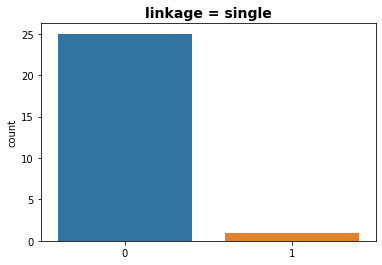

In [234]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters = 2, linkage='single') 
clf.fit(X)

labels = clf.labels_
df['Cluster'] = labels

sns.countplot(x=labels)
plt.title('linkage = single', fontsize=14, weight='bold')
plt.show()


## Clusterização `Kmeans`,  $K=3$.

Vamos considerar que nossa análise ao final leva ao uso do Kmeans para 3 grupos de dados. De fato essa parece ser a melhor opção embora não tenhamos explorado isso aqui. Verique que a distribuição dos dados é de fato melhor e analise para esse modelo os valores médios dos grupos e os países pertencentes a cada grupo.

(Moodle) **Q4**. Há um grupo que se caracteriza por um % médio maior da força de trabalho empregada na agricultura. Qual esse percentual e que países fazem parte dele? 



###Observando o Gráfico encontramos a Grécia, Yuguslávia e Turquia em destaque, com percentual próximo a 50%###



(Moodle) **Q5**. Excetuando o grupo o com % médio maior da força de trabalho empregada na agricultura e esse indicador, o que mais se destaca em diferenciar os outros dois grupos?

> Empregue `random_state= 1234` no `KMeans`. Não empregue outros parâmetros não solicitados.



[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 2 2 2 2 2 2 2 0]
[[ 2.17579264 -0.33695415 -1.87839051 -0.83405766 -1.79639567 -1.17191669
   0.33913963 -1.58626377 -1.40190152]
 [-0.49645361 -0.46398587  0.06891443  0.02997395  0.27708668  0.68508261
   0.42695257  0.42212305  0.01198006]
 [ 0.20226856  1.20494805  0.6475058   0.2889414   0.13654287 -1.06365309
  -1.12123713 -0.28502536  0.57343195]]


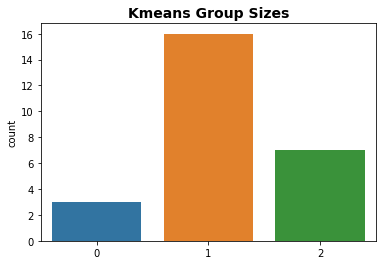

In [235]:
# seu código

from sklearn.preprocessing import StandardScaler

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3 , random_state= 1234)  

# Ajusta o estimador aos dados
clf.fit(X) 

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

sns.countplot(x=labels)
plt.title('Kmeans Group Sizes', fontsize=14, weight='bold')
plt.show()

In [236]:
# seu código
df['Cluster'] = labels
df.head()

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,1


In [201]:
df.groupby('Cluster').mean()

,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
Cluster,,,,,,,,,
0,11.516667,1.000000,28.383333,1.200000,7.833333,16.066667,4.983333,22.516667,6.483333
1,28.275000,1.975000,28.475000,0.675000,8.550000,6.875000,0.850000,17.400000,6.975000
2,34.600000,0.450000,21.050000,0.600000,8.250000,12.400000,2.550000,13.850000,6.200000
3,14.133333,2.966667,35.433333,1.466667,8.166667,9.933333,1.000000,19.066667,7.800000
4,66.800000,0.700000,7.900000,0.100000,2.800000,5.200000,1.100000,11.900000,3.200000
5,48.700000,1.500000,16.800000,1.100000,4.900000,6.400000,11.300000,5.300000,4.000000
6,22.900000,0.800000,28.500000,0.700000,11.500000,9.700000,8.500000,11.800000,5.500000
7,11.800000,0.400000,32.700000,0.650000,9.750000,17.800000,3.450000,17.750000,5.700000
8,7.700000,3.100000,30.800000,0.800000,9.200000,18.500000,4.600000,19.200000,6.200000


In [241]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df[['Agr']])
X = scaler.transform(df[['Agr']])

# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3 , random_state= 1234)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[1 1 1 1 2 1 1 1 1 1 1 0 1 2 2 1 1 0 2 1 1 2 2 2 2 0]
[[ 2.17579264]
 [-0.67853917]
 [ 0.4563387 ]]


In [242]:
df['Cluster'] = labels
df.head(10)

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC,Cluster
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2,1
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1,1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7,1
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1,1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1,2
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7,1
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2,1
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8,1
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4,1
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0,1


In [243]:
from sklearn.cluster import AgglomerativeClustering

clf = AgglomerativeClustering(n_clusters=3)  
clf.fit(X)

# Resultados
labels = clf.labels_
print(labels)

[1 1 1 1 2 1 1 1 1 1 1 0 1 2 2 1 1 0 2 1 1 2 2 2 2 0]


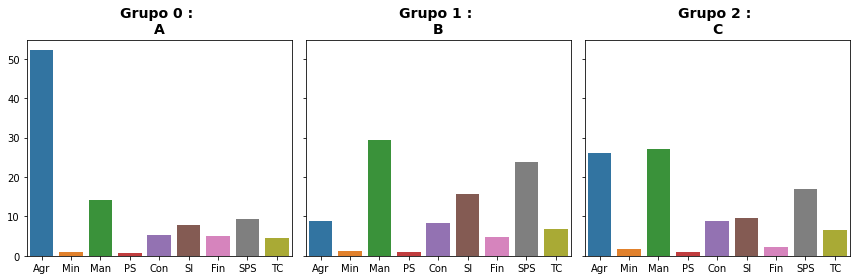

In [245]:
g = pd.DataFrame( df.groupby('Cluster').mean() ).reset_index()

fig, ax = plt.subplots(1,3,figsize=(12,4),sharey=True)

nomes = ['A','B','C']

for i in range(len(g)):
  sns.barplot(data=g[g.Cluster==i].drop(columns='Cluster'),ax=ax[i])
  ax[i].set_title('Grupo ' + str(i) + ' : \n' + nomes[i], fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

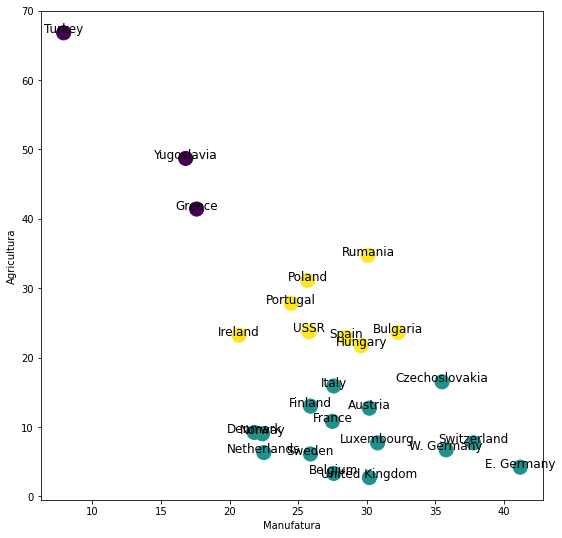

In [250]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Man' ,y = 'Agr' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Man[line], df.Agr[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Agricultura') , plt.xlabel('Manufatura')
plt.show()

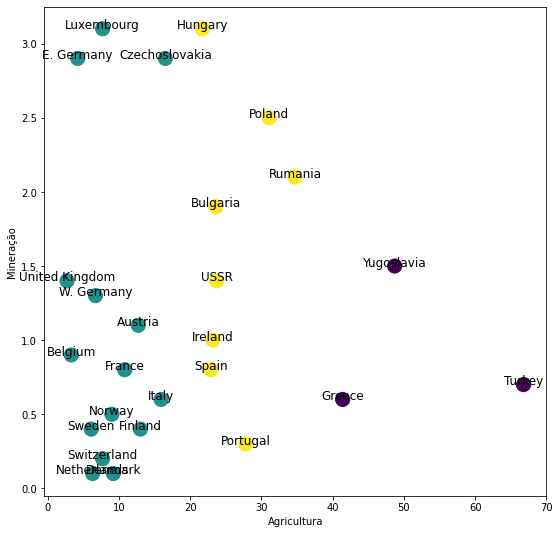

In [273]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Agr' ,y = 'Min' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.Min[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Mineração') , plt.xlabel('Agricultura')
plt.show()

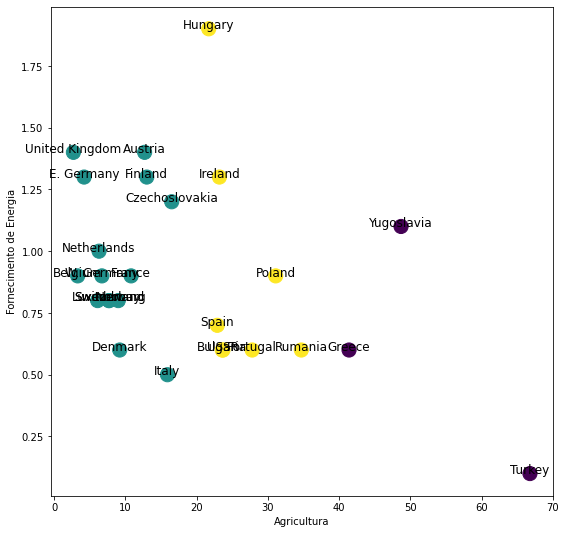

In [272]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Agr' ,y = 'PS' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.PS[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Fornecimento de Energia') , plt.xlabel('Agricultura')
plt.show()

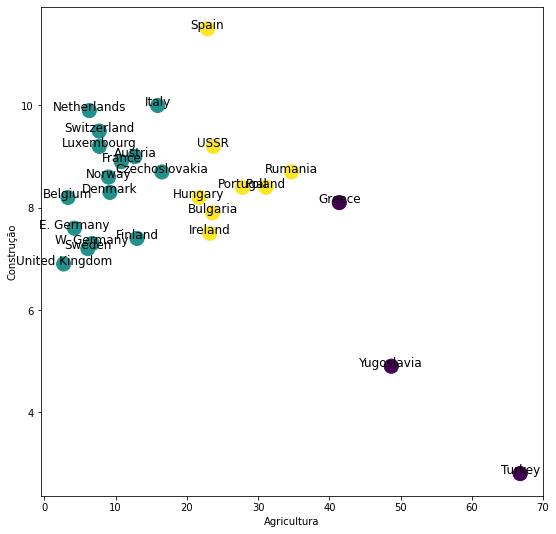

In [271]:
f = plt.figure(figsize=(9,9))

real_centroids = scaler.inverse_transform(centroids)

plt.scatter(x = 'Agr' ,y = 'Con' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.Con[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Construção') , plt.xlabel('Agricultura')
plt.show()

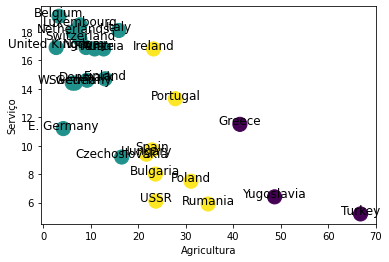

In [270]:
plt.scatter(x = 'Agr' ,y = 'SI' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.SI[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Serviço') , plt.xlabel('Agricultura')
plt.show()

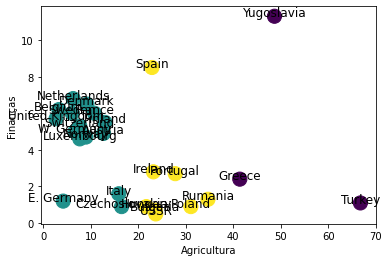

In [269]:
plt.scatter(x = 'Agr' ,y = 'Fin' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.Fin[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Finanças') , plt.xlabel('Agricultura')
plt.show()

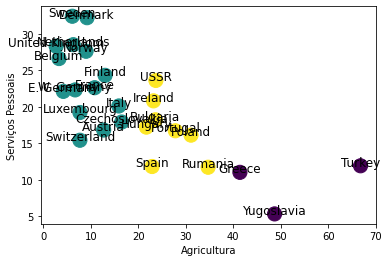

In [268]:
plt.scatter(x = 'Agr' ,y = 'SPS' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.SPS[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Serviços Pessoais') , plt.xlabel('Agricultura')
plt.show()

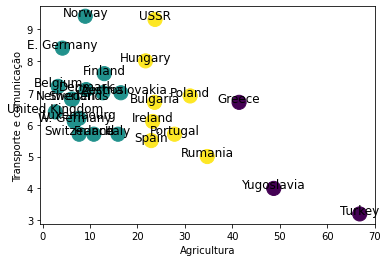

In [267]:
plt.scatter(x = 'Agr' ,y = 'TC' , data = df, c = labels , s = 200 )

for line in range(0,df.shape[0]):
  plt.text(df.Agr[line], df.TC[line], df.Country[line], 
           horizontalalignment='center', 
           size='large', 
           color='black')
  
plt.ylabel('Transporte e comunicação') , plt.xlabel('Agricultura')
plt.show()